# Smoothing: Low-Order Polynomial Models

We now go back to using lower-order polynomial models to avoid the problems with high-order, perfect fit polynomials.

We will need a fitting criterion when we do this, so let's use the least-squares criterion. A possible problem is that although we have optimizer functions in `linear_fitting_functions.py`, they **only work for straight-line models**, which is not what we have here!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Section 4.3 Example 1

The tape recorder data from Example 1 in Section 4.3 (I have renamed $c \to x$ and $t\to y$ for simplicity) is set up in the following cell.

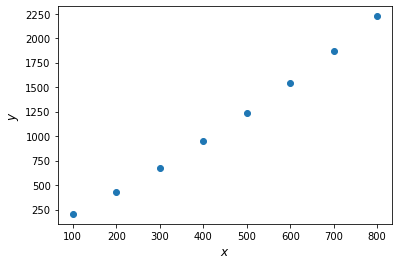

In [2]:
x1 = np.array([100,200,300,400,500,600,700,800])
y1 = np.array([205,430,677,945,1233,1542,1872,2224])
plt.plot(x1, y1, 'o')
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y$', fontsize=12);

## Least-squares as a linear algebra problem

Wikipedia article on Ordinary Least Squares (some differences in notation but this is what I am doing here) https://en.wikipedia.org/wiki/Ordinary_least_squares#Matrix/vector_formulation

There are lots of ways to do this, including exact methods using normal equations. As you saw in Lab 5, the algebra is a pain in the butt, so I'm going to do this using linear algebra. Your normal equations from that lab come from linear algebra in the first place, so this is really the same thing except you don't get formulas in the end for the coefficients in a general sense.

We are going to fit this data set using a quadratic model

$$ f(x) = a_0 + a_1 x + a_2 x^2 $$

which has 3 parameters.

Now that we've done some matrix algebra for polynomial fitting, it will be easier to understand what I'm setting up as we go through this problem. Some notation

- $m$ is the number of data points (for this example $m=8$)
- $p$ is the number of parameters (for this example, $p=3$)
- $(x_i,y_i)$ is the $i$th data point in the data set

Now let's set up the linear system of equations that solves the least-squares problem for linear models. Let's set up a matrix $\hat{A}$ similar to what we did for high-order polynomials. It has a number of rows $m$ equal to the number of data points, and columns equal to the number of parameters $p$. Since our number of parameters $p<m$, this will no longer be a square matrix.

$$ \hat{A} = \begin{pmatrix} 
x_1^0 & x_1^1 & x_1^2 & \ldots & x_1^p \\ 
x_2^0 & x_2^1 & x_2^2 & \ldots & x_2^p \\ 
\vdots & & & & \vdots \\
x_m^0 & x_m^1 & x_m^2 & \ldots & x_m^p \\ 
\end{pmatrix} $$

For this example, the matrix would be $m\times p = 8\times 3$.

It turns out that (see a linear regression reference for why/how this is), if $\vec{a}$ is again the vector of parameters and $\vec{b}$ is again the vector of data points $\vec{b}^T = (y_1,y_2,\ldots,y_m)$, that the least-squares solution that minimizes the sum of least-squares is

$$ \vec{a} = (\hat{A}^T \hat{A})^{-1} \hat{A}^T \vec{b} $$

So we just need to set up and calculate to get our parameters. This elegant equation results in the same thing you ended up getting for the results in Lab 5 for a quadratic model, now elegantly written out as a matrix equation.

In [3]:
n1 = len(x1)
p1 = 3 # set up order of polynomial model to be used
Amx1 = np.empty((n1,p1))
for i in range(0,n1): # iterate over rows
    for j in range(0,p1): # iterate over columns
        Amx1[i,j] = x1[i]**float(j)

In [4]:
print(Amx1)

[[1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 2.0e+02 4.0e+04]
 [1.0e+00 3.0e+02 9.0e+04]
 [1.0e+00 4.0e+02 1.6e+05]
 [1.0e+00 5.0e+02 2.5e+05]
 [1.0e+00 6.0e+02 3.6e+05]
 [1.0e+00 7.0e+02 4.9e+05]
 [1.0e+00 8.0e+02 6.4e+05]]


There is our matrix for this problem. Now all we need to is use the built-in numpy functions to numerically solve the problem.

- To take the transpose of a matrix, use `Amx1.T` (append `.T` to the end of the matrix)
- To take the inverse, use `np.linalg.inv(Amx1)`

In [5]:
avec1 = ( np.linalg.inv(Amx1.T @ Amx1) @ Amx1.T ) @ y1

In [6]:
print(avec1)

[1.42857143e-01 1.94226190e+00 1.04642857e-03]


These are the exact least-squares results for the coefficients of the quadratic model!

In [7]:
npred1 = 100
xpred1 = np.linspace(0,900,num=npred1)
ypred1 = np.empty(npred1)
for i in range(0,npred1):
    ypred1[i] = avec1[0] + avec1[1] * xpred1[i] + avec1[2]*xpred1[i]**2.0

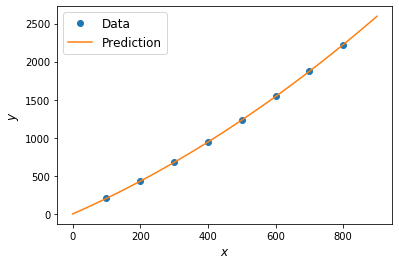

In [8]:
plt.plot(x1, y1, 'o', label='Data')
plt.plot(xpred1, ypred1, '-', label='Prediction')
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$y$', fontsize=12)
plt.legend(fontsize=12);

Looks great, and verifies that we did the linear algebra for the least squares problem correctly.

## Computing divided differences

One way of getting a handle on the order of polynomial to use for a data set is computing the divided differences. These are essentially an approximation of different orders of derivatives to see if there is evidence of different kinds of polynomial behavior. I.e., the $p+1$st derivative of a degree $p$ polynomial is zero.

In [9]:
first_diffs1 = np.empty(n1-1) # there are m - 1 first differences
for i in range(0,n1-1):
    first_diffs1[i] = (y1[i+1] - y1[i])/(x1[i+1]-x1[i])

In [10]:
print(first_diffs1)

[2.25 2.47 2.68 2.88 3.09 3.3  3.52]


In [11]:
print(x1)

[100 200 300 400 500 600 700 800]


In [12]:
(first_diffs1[1]-first_diffs1[0])/(x1[2]-x1[0])

0.001100000000000001

In [13]:
second_diffs1 = np.empty(n1-2)
for i in range(0, n1-2):
    second_diffs1[i] = (first_diffs1[i+1]-first_diffs1[i])/(x1[i+2]-x1[i])

In [14]:
print(second_diffs1)

[0.0011  0.00105 0.001   0.00105 0.00105 0.0011 ]


In [15]:
third_diffs1 = np.empty(n1-3)
for i in range(0, n1-3):
    third_diffs1[i] = (second_diffs1[i+1]-second_diffs1[i])/(x1[i+3]-x1[i])

In [16]:
print(third_diffs1)

[-1.66666667e-07 -1.66666667e-07  1.66666667e-07  0.00000000e+00
  1.66666667e-07]


The following function computes divided differences to 4 digit precision. If you need more precision you will need to do what's above.

In [17]:
from divided_differences import *

In [18]:
divided_differences(x1, y1, 3)

        Data          |      Differences     
                      |  Delta_1   |  Delta_2   |  Delta_3   |
  100.00  |   205.00  |
  200.00  |   430.00  |  2.250000  |
  300.00  |   677.00  |  2.470000  |  0.001100  |
  400.00  |   945.00  |  2.680000  |  0.001050  | -0.000000  |
  500.00  |  1233.00  |  2.880000  |  0.001000  | -0.000000  |
  600.00  |  1542.00  |  3.090000  |  0.001050  |  0.000000  |
  700.00  |  1872.00  |  3.300000  |  0.001050  |  0.000000  |
  800.00  |  2224.00  |  3.520000  |  0.001100  |  0.000000  |


The divided differences (approximations of the derivative) going to zero shows evidence for different amounts of curvature in this data set. There is evidence in this data set for curvature up to the second derivative. The third derivative being nearly zero **relative to the size of the data (y values)** is evidence that there is no cubic term that would describe this data set.

## Section 4.3 Example 3

The vehicular stopping distance model relates the distance required to stop a vehicle to the speed the vehicle was traveling.

In [19]:
x2 = np.array([20,25,30,35,40,45,50,55,60,65,70,75,80])
y2 = np.array([42,56,73.5,91.5,116,142.5,173,209.5,248,292.5,343,401,464])

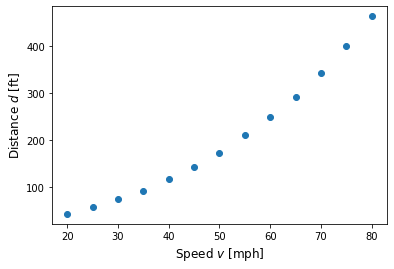

In [20]:
plt.plot(x2, y2, 'o')
plt.xlabel(r'Speed $v$ [mph]', fontsize=12)
plt.ylabel(r'Distance $d$ [ft]', fontsize=12);

Visually it looks like a quadratic model will fit this data set well. Let's see what the divided differences are for this data set.

In [21]:
divided_differences(x2,y2,3)

        Data          |      Differences     
                      |  Delta_1   |  Delta_2   |  Delta_3   |
  20.00   |   42.00   |
  25.00   |   56.00   |  2.800000  |
  30.00   |   73.50   |  3.500000  |  0.070000  |
  35.00   |   91.50   |  3.600000  |  0.010000  | -0.004000  |
  40.00   |   116.00  |  4.900000  |  0.130000  |  0.008000  |
  45.00   |   142.50  |  5.300000  |  0.040000  | -0.006000  |
  50.00   |   173.00  |  6.100000  |  0.080000  |  0.002667  |
  55.00   |   209.50  |  7.300000  |  0.120000  |  0.002667  |
  60.00   |   248.00  |  7.700000  |  0.040000  | -0.005333  |
  65.00   |   292.50  |  8.900000  |  0.120000  |  0.005333  |
  70.00   |   343.00  | 10.100000  |  0.120000  | -0.000000  |
  75.00   |   401.00  | 11.600000  |  0.150000  |  0.002000  |
  80.00   |   464.00  | 12.600000  |  0.100000  | -0.003333  |


In [22]:
n2 = len(x2)
p2 = 3 # number of parameters in polynomial model 2+1 = 3
Amx2 = np.empty((n2,p2))
for i in range(0,n2): # iterate over rows
    for j in range(0,p2): # iterate over columns
        Amx2[i,j] = x2[i]**float(j)

In [23]:
avec2 = ( np.linalg.inv(Amx2.T @ Amx2) @ Amx2.T ) @ y2
print(avec2)

[50.05944056 -1.97012987  0.08859141]


In [33]:
npred2 = 100
xpred2 = np.linspace(0,120,num=npred2)
ypred2 = np.empty(npred2)
for i in range(0,npred2):
    ypred2[i] = avec2[0] + avec2[1] * xpred2[i] + avec2[2]*xpred2[i]**2.0

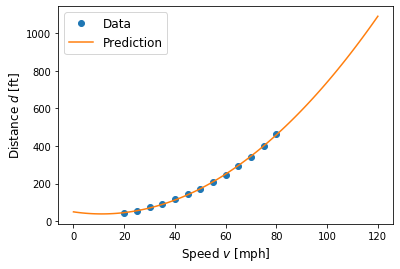

In [34]:
plt.plot(x2, y2, 'o', label='Data')
plt.plot(xpred2, ypred2, '-', label='Prediction')
plt.xlabel(r'Speed $v$ [mph]', fontsize=12)
plt.ylabel(r'Distance $d$ [ft]', fontsize=12)
plt.legend(fontsize=12);

## Discuss extrapolation and interpolation reliability

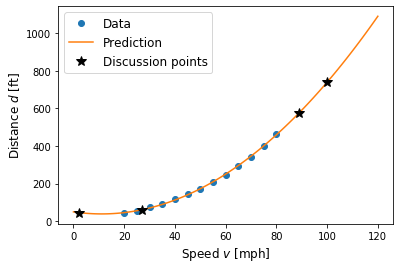

In [35]:
plt.plot(x2, y2, 'o', label='Data')
plt.plot(xpred2, ypred2, '-', label='Prediction')
# plot the points discussed in interpolation/extrapolation discussion
xpts_disc2 = np.array([2,27,89,100])
ypts_disc2 = avec2[0] + avec2[1] * xpts_disc2 + avec2[2]*xpts_disc2**2.0
plt.plot(xpts_disc2, ypts_disc2, '*', markersize=10, color='black', label='Discussion points')
plt.xlabel(r'Speed $v$ [mph]', fontsize=12)
plt.ylabel(r'Distance $d$ [ft]', fontsize=12)
plt.legend(fontsize=12);

In [37]:
print(ypts_disc2)

[ 46.47354645  61.44907093 576.45042957 738.96053946]
